In [1]:
import yaml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# plt.style.use(['science','ieee'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# I don't know why we need this but we need it otherwise, font.size won't work.
fig = plt.figure(figsize =(12, 6))
fig.show()

plt.rcParams.update({'font.size': 16})

/var/folders/pv/5ntnhsd934q99bbj_55cvf8w0000gn/T/ipykernel_44126/2227297068.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x432 with 0 Axes>

In [2]:
import json
with open("result.json") as f:
    data = json.load(f)

In [3]:
data

{'env': ['Ubuntu 20.04', 'CPU optimized, dedicated threads, 2 CPU, 4 GB'],
 'giga_flop': {'python': {'ans': 6.010226,
   'time': [23236.213,
    23235.427,
    23236.721,
    23230.062,
    23233.234,
    23235.436,
    23241.254,
    23233.313,
    23236.175,
    23242.041,
    23241.749,
    23237.865,
    23241.237,
    23231.863,
    23238.11,
    23234.612,
    23227.385,
    23232.925,
    23244.918,
    23236.516,
    23227.477,
    23232.41,
    23242.981,
    23236.608,
    23236.161,
    23237.499,
    23233.681,
    23232.749,
    23231.963,
    23232.761,
    23241.192,
    23229.746,
    23231.553,
    23231.003,
    23240.599,
    23237.511,
    23225.134,
    23243.396,
    23233.292,
    23230.661,
    23241.069,
    23244.831,
    23242.326,
    23239.761,
    23231.969,
    23236.558,
    23233.219,
    23236.647,
    23237.397,
    23236.19,
    23243.348,
    23237.364,
    23227.924,
    23237.836,
    23235.114,
    23233.383,
    23242.281,
    23242.627,
    232

In [4]:
norm_data = {}
for exe, item in data["giga_flop"].items():
    times = item["time"]
    avg_time = np.mean([float(t) for t in times])
    norm_data[exe] = round(avg_time)
print(norm_data)
df = pd.DataFrame.from_dict(norm_data, orient='index', columns=['time'])
print(df)

{'python': 23236, 'cpp': 1719, 'nativeJS': 1058, 'pyodide': 85989, 'wasm': 1059}
           time
python    23236
cpp        1719
nativeJS   1058
pyodide   85989
wasm       1059


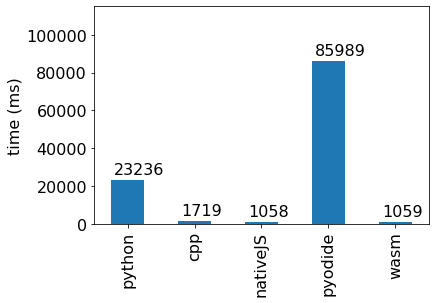

In [5]:
ax = df.plot(y="time", kind="bar", use_index=True, ylabel="time (ms)")
ax.legend().set_visible(False)
ax.set_ylim(0,115000)
# ax.grid(visible=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 3000))

In [8]:
norm_data = defaultdict(dict)
for exe, item in data["matmul"].items():
    for size in item:
        times = item[size]["time"]
        avg_time = np.mean([float(t) for t in times])
        norm_data[exe][size] = round(avg_time)
print(norm_data)
df = pd.DataFrame.from_dict(norm_data, orient='index', columns=['size_128', 'size_256', 'size_512', 'size_1024'])
print(df)
df = df.transpose()
print(df)

defaultdict(<class 'dict'>, {'python': {'size_128': 747, 'size_256': 5951, 'size_512': 50895, 'size_1024': 414106}, 'pyodide': {'size_128': 2073, 'size_256': 16557, 'size_512': 132442, 'size_1024': 1078547}, 'cpp': {'size_128': 2, 'size_256': 14, 'size_512': 148, 'size_1024': 3057, 'size_2048': 40041}, 'nativeJS': {'size_128': 5, 'size_256': 41, 'size_512': 466, 'size_1024': 4697}, 'wasm': {'size_128': 2, 'size_256': 20, 'size_512': 197, 'size_1024': 3159}})
          size_128  size_256  size_512  size_1024
python         747      5951     50895     414106
pyodide       2073     16557    132442    1078547
cpp              2        14       148       3057
nativeJS         5        41       466       4697
wasm             2        20       197       3159
           python  pyodide   cpp  nativeJS  wasm
size_128      747     2073     2         5     2
size_256     5951    16557    14        41    20
size_512    50895   132442   148       466   197
size_1024  414106  1078547  3057      469

(0.0, 90000.0)

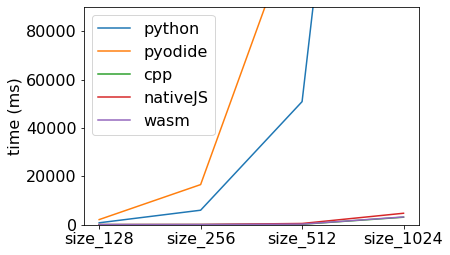

In [9]:
ax = df.plot(use_index=True, ylabel="time (ms)")
ax.set_ylim(0, 90000)